In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('flowers.csv')
data.head()

,Area_Code,Locality_Code,Region_Code,Height,Diameter,Class,Species
0,4694,17,1609,3.0,5.0,7,48
1,781,7,1380,4.0,17.0,2,54
2,21014,6,1122,3.0,11.0,1,22
3,7326,6,556,3.0,34.0,7,25
4,13122,17,1752,5.0,16.0,2,128


In [3]:
features = list(data.columns.drop('Class'))
features

['Area_Code', 'Locality_Code', 'Region_Code', 'Height', 'Diameter', 'Species']

In [4]:
print(f'Число наблюдений: {data.shape[0]}\nКоличество признаков: {len(features)}')

Число наблюдений: 12666
Количество признаков: 6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12666 entries, 0 to 12665
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_Code      12666 non-null  int64  
 1   Locality_Code  12666 non-null  int64  
 2   Region_Code    12666 non-null  int64  
 3   Height         12666 non-null  float64
 4   Diameter       12666 non-null  float64
 5   Class          12666 non-null  int64  
 6   Species        12666 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 692.8 KB


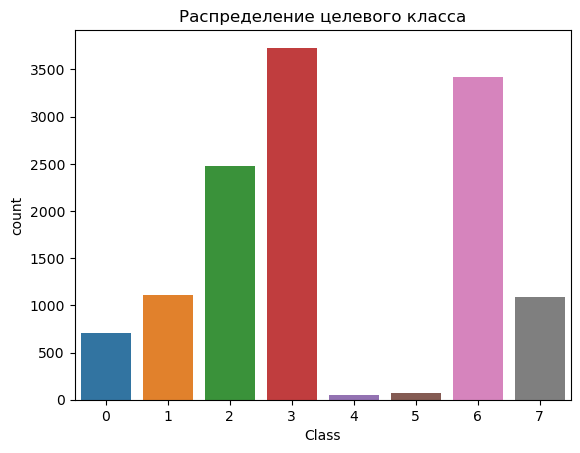

In [6]:
ax = sns.countplot(x=data['Class'])
ax.set_title('Распределение целевого класса');

In [7]:
print('Количество общих областей сбора образцов: ', len(data['Area_Code'].unique()))
print('Количество местностей сбора образцов: ', len(data['Locality_Code'].unique()))
print('Количество регионов сбора образцов: ', len(data['Region_Code'].unique()))

Количество общих областей сбора образцов:  10122
Количество местностей сбора образцов:  21
Количество регионов сбора образцов:  1870


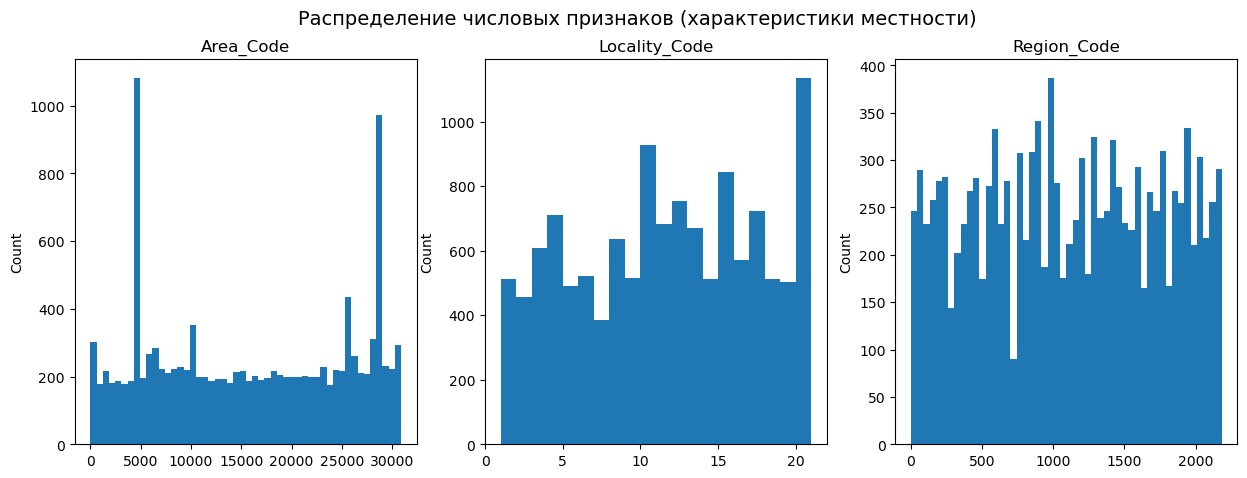

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Распределение числовых признаков (характеристики местности)', fontsize=14)

for idx, feature in enumerate(['Area_Code', 'Locality_Code', 'Region_Code']):
    bins = 50 if idx != 1 else 20
    axes[idx].hist(data[feature], bins=bins)
    axes[idx].set_title(feature)
    axes[idx].set_ylabel('Count')

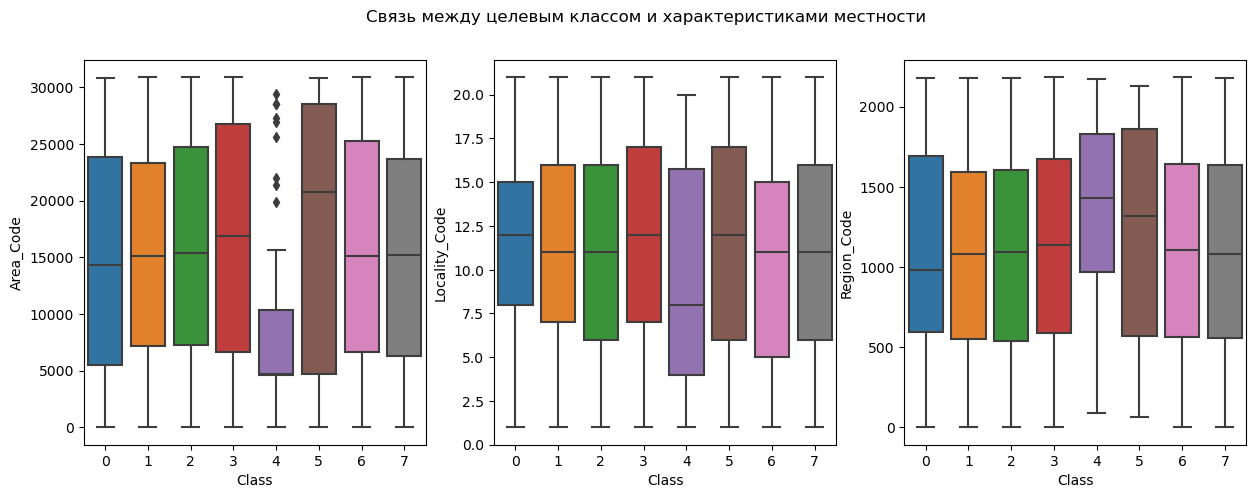

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Связь между целевым классом и характеристиками местности')
for idx, feature in enumerate(['Area_Code', 'Locality_Code', 'Region_Code']):
    sns.boxplot(x='Class', y=feature, data=data, ax=axes[idx])

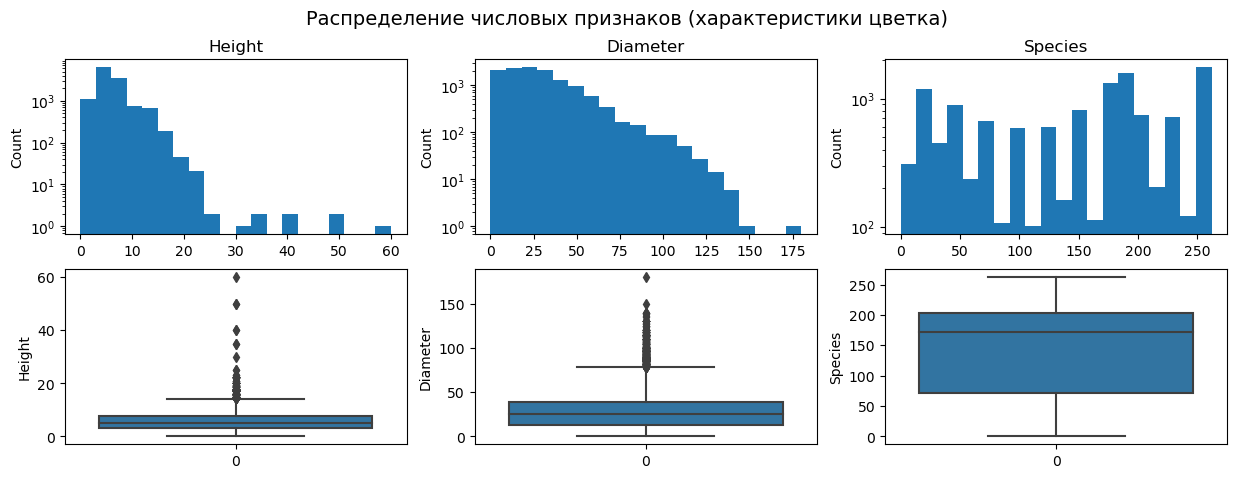

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
fig.suptitle('Распределение числовых признаков (характеристики цветка)', fontsize=14)

for idx, feature in enumerate(['Height', 'Diameter', 'Species']):
    axes[0][idx].hist(data[feature], bins=20, log=True)
    axes[0][idx].set_title(feature)
    axes[0][idx].set_ylabel('Count')
    sns.boxplot(data[feature], ax=axes[1][idx])
    axes[1][idx].set_ylabel(feature)

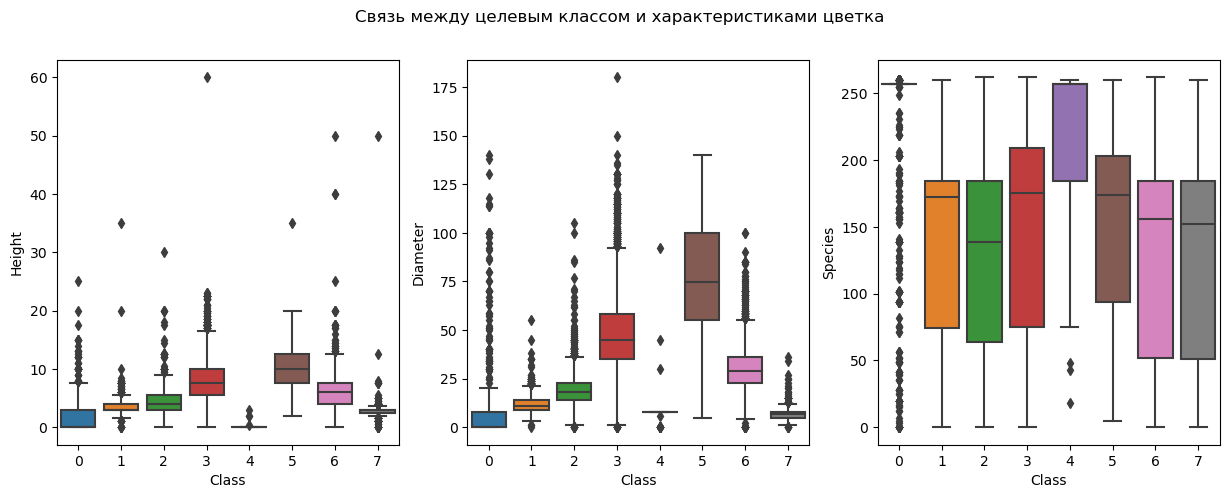

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Связь между целевым классом и характеристиками цветка')
for idx, feature in enumerate(['Height', 'Diameter', 'Species']):
    sns.boxplot(x='Class', y=feature, data=data, ax=axes[idx])

In [15]:
# Нормализуем Height, Diameter с помощью Z-масштабирования
print('----- До нормализации -----')
print(f'Height: mean = {data["Height"].mean():.3f}, std = {data["Height"].std():.3f}')
print(f'Diameter: mean = {data["Diameter"].mean():.3f}, std = {data["Diameter"].std():.3f}\n')

data['Height'] = (data['Height'] - data['Height'].mean()) / data['Height'].std()
data['Diameter'] = (data['Diameter'] - data['Diameter'].mean()) / data['Diameter'].std()

print('----- После нормализации -----')
print(f'Height: mean = {data["Height"].mean():.3f}, std = {data["Height"].std():.3f}')
print(f'Diameter: mean = {data["Diameter"].mean():.3f}, std = {data["Diameter"].std():.3f}')

----- До нормализации -----
Height: mean = 5.600, std = 3.561
Diameter: mean = 29.060, std = 21.561

----- После нормализации -----
Height: mean = -0.000, std = 1.000
Diameter: mean = -0.000, std = 1.000


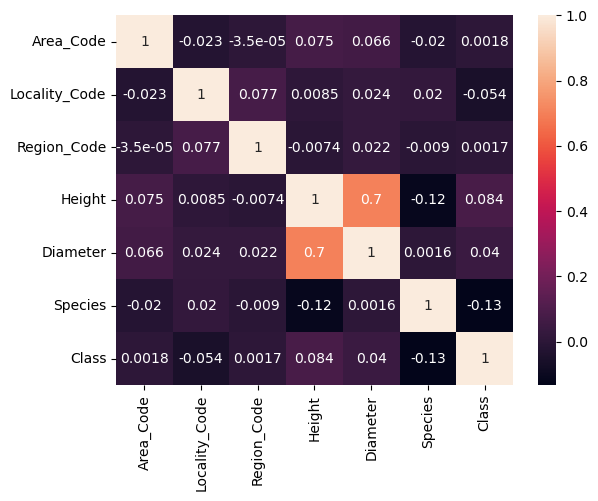

In [16]:
corr_matrix = data[features + ['Class']].corr()
sns.heatmap(corr_matrix, annot=True);